# Advanced Topic Modeling: Part 2

- MALLET
- Low-level API
- DKPro-Wrapper

In [2]:
import dariah

In [3]:
d = dariah.dkpro.processing.DKPro("ddw-0.4.6.jar")

In [10]:
d.process(filepath="/home/severin/Desktop/test.txt", language="de", output=".")

INFO: Input: /home/severin/Desktop/test.txt
INFO: Output: .
INFO: Config: configs/default.properties, configs/default_de.properties
INFO: Language: de
INFO: Reader: Text
INFO: Process 1 files
INFO: Start running the pipeline (this may take a while)...
INFO: Process file: test.txt
INFO: ---- DONE -----
INFO: All files processed in 0.66 minutes


True

In [4]:
df = d.read("test.txt.csv")

In [1]:
from dariah.dkpro import core

In [2]:
documents = list()
from pathlib import Path

for file in Path(".").glob("*.csv"):
    documents.append(core.Document(file))

In [5]:
c = core.Corpus(documents)

In [3]:
documents[0].filter(pos=["NN"]).name

'test'

In [10]:
c.ttr

1.0

In [3]:
features = c.hapax + c.mfw(100)
features[:10]

["a'mighty",
 "a'n",
 'a-bakin',
 'a-beatin',
 'a-begging',
 'a-bleatin',
 'a-bringin',
 'a-carrying',
 'a-collectin',
 'a-comin']

In [4]:
print(c.dtm.shape)
dtm = c.drop(c.dtm, features)
print(dtm.shape)

(10, 33050)
(10, 16455)


In [10]:
m = dariah.topics.modeling.LDA(num_topics=10,
                               num_iterations=100,
                               alpha=0.1,
                               eta=0.01,
                               implementation="mallet",
                               executable="/home/severin/Downloads/mallet-2.0.8/bin/mallet")

In [11]:
m.fit(dtm)

In [17]:
m.topics.iloc[:, :10]

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
topic0,phineas,lord,laura,finn,house,kennedy,violet,parliament,chiltern,nothing
topic1,don,can,lopez,course,father,duke,money,thought,nothing,wharton
topic2,tom,crawley,maggie,osborne,rebecca,amelia,tulliver,pitt,dobbin,rawdon
topic3,jones,indeed,may,adams,those,these,answered,joseph,being,most
topic4,it,got,again,can,while,better,look,round,there,quite
topic5,adam,hetty,work,eyes,thee,mother,young,arthur,day,long
topic6,young,captain,sir,over,george,day,went,friend,most,house
topic7,our,where,years,way,world,came,always,gentleman,first,take
topic8,began,though,two,ever,thought,poor,make,chapter,part,heard
topic9,peggotty,down,went,aunt,don,here,house,sir,being,myself


In [13]:
v = dariah.topics.visualization.Vis(m)

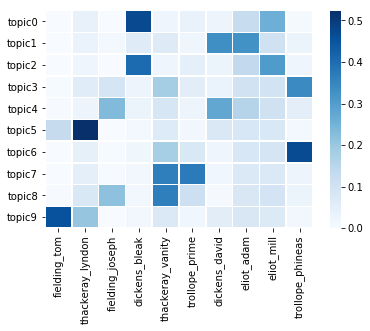

In [15]:
v.topic_document()